In [153]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.metrics import plot_roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix, auc, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize, Normalizer, StandardScaler, MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, MeanShift, OPTICS, SpectralClustering, KMeans, AgglomerativeClustering, AffinityPropagation, Birch, DBSCAN
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score, homogeneity_completeness_v_measure, adjusted_mutual_info_score, calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Label, HoverTool, Select, NormalHead, Arrow, MultiChoice, FactorRange, ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import show, output_notebook 
from bokeh.layouts import row
from bokeh.transform import factor_cmap
from bokeh.layouts import column, row
import ipywidgets as widgets
import seaborn as sns
output_notebook()

Loading BokehJS ...

### Corey and Shuai want to create the perfect iris scent for their perfume shop. To make the best smell possible there are exact percentages of three species of iris that need to used in the perfume. They are excited to apply their data mining knowledge to classify the bundles of iris flowers they get shipped to their shop.

In [1]:
from IPython.display import HTML
HTML ("""<div style="width:1000px"><iframe allow="fullscreen" frameBorder="0" height="750" src="https://giphy.com/embed/BYGf5pxcA18gQRWaFt/video" width="1000"></iframe></div>""")

## Import Data

In [83]:
iris = load_iris(as_frame=True)['data']
iris['Species'] = load_iris(as_frame=True)['target']
iris['Species'] = iris['Species'].map(pd.Series(load_iris().target_names))
iris.columns = iris.columns.str.replace("\ \(cm\)", "", regex=True)
iris.columns = iris.columns.str.replace("\s", "_", regex=True)
iris = iris[['Species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
features = iris.columns.drop(['Species'])
iris_scaled = iris.copy()
for col in iris.columns[1:]:
    iris_scaled[col+"_scaled"] = ((iris[col] - iris[col].min())/(iris[col].max()-iris[col].min())+1) * 10
iris_scaled.sample(10)

,Species,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled
13,setosa,4.3,3.0,1.1,0.1,10.000000,14.166667,10.169492,10.000000
73,versicolor,6.1,2.8,4.7,1.2,15.000000,13.333333,16.271186,14.583333
70,versicolor,5.9,3.2,4.8,1.8,14.444444,15.000000,16.440678,17.083333
49,setosa,5.0,3.3,1.4,0.2,11.944444,15.416667,10.677966,10.416667
130,virginica,7.4,2.8,6.1,1.9,18.611111,13.333333,18.644068,17.500000
106,virginica,4.9,2.5,4.5,1.7,11.666667,12.083333,15.932203,16.666667
48,setosa,5.3,3.7,1.5,0.2,12.777778,17.083333,10.847458,10.416667
127,virginica,6.1,3.0,4.9,1.8,15.000000,14.166667,16.610169,17.083333
4,setosa,5.0,3.6,1.4,0.2,11.944444,16.666667,10.677966,10.416667
84,versicolor,5.4,3.0,4.5,1.5,13.055556,14.166667,15.932203,15.833333


## EDA

In [84]:
profile = pp.ProfileReport(iris)
profile.to_widgets()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

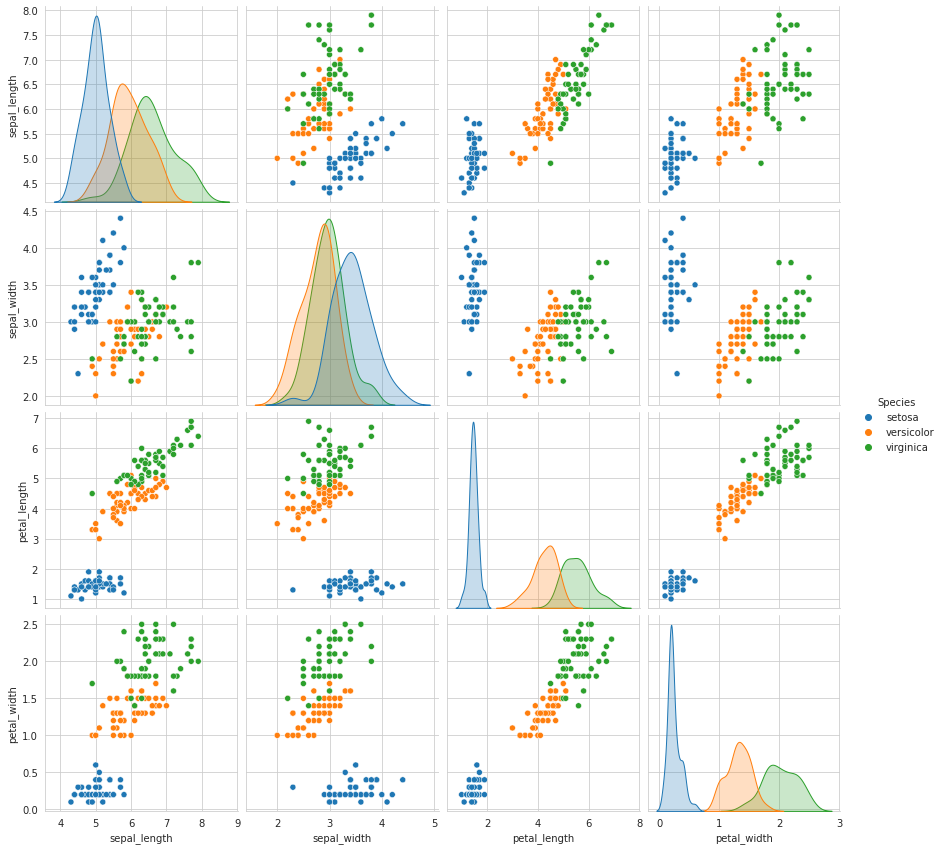

In [85]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species",  height=3)
plt.show()

## Setup Princpal Component Analysis

In [88]:
# Scale the data and apply sklearns PCA algorithm to features
X = StandardScaler().fit_transform(iris.iloc[:,1:5])
pca = PCA()
x_pca = pca.fit_transform(X)
iris_pca = pd.concat([iris, pd.DataFrame(x_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])], axis=1)
#Save regualar features and PCA features column names in an array for quicker indexing later
features = ['sepal_length', 'sepal_width','petal_length','petal_width']
target = ['Species']
pca_features = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
iris_pca.sample(10)

,Species,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3,PCA4
1,setosa,4.9,3.0,1.4,0.2,-2.080961,-0.674134,-0.234609,-0.103007
4,setosa,5.0,3.6,1.4,0.2,-2.389842,0.646835,0.015738,0.035923
34,setosa,4.9,3.1,1.5,0.2,-2.109975,-0.460202,-0.170275,-0.029023
104,virginica,6.5,3.0,5.8,2.2,1.867812,0.295045,0.395628,0.016298
45,setosa,4.8,3.0,1.4,0.3,-2.069744,-0.711053,-0.063930,-0.140270
43,setosa,5.0,3.5,1.6,0.6,-1.964448,0.472327,0.309601,-0.177093
8,setosa,4.4,2.9,1.4,0.2,-2.334640,-1.115328,0.145077,0.026859
0,setosa,5.1,3.5,1.4,0.2,-2.264703,0.480027,-0.127706,-0.024168
119,virginica,6.0,2.2,5.0,1.5,1.263767,-1.706745,-0.267537,0.065181
38,setosa,4.4,3.0,1.3,0.2,-2.429633,-0.904180,0.193255,0.009738


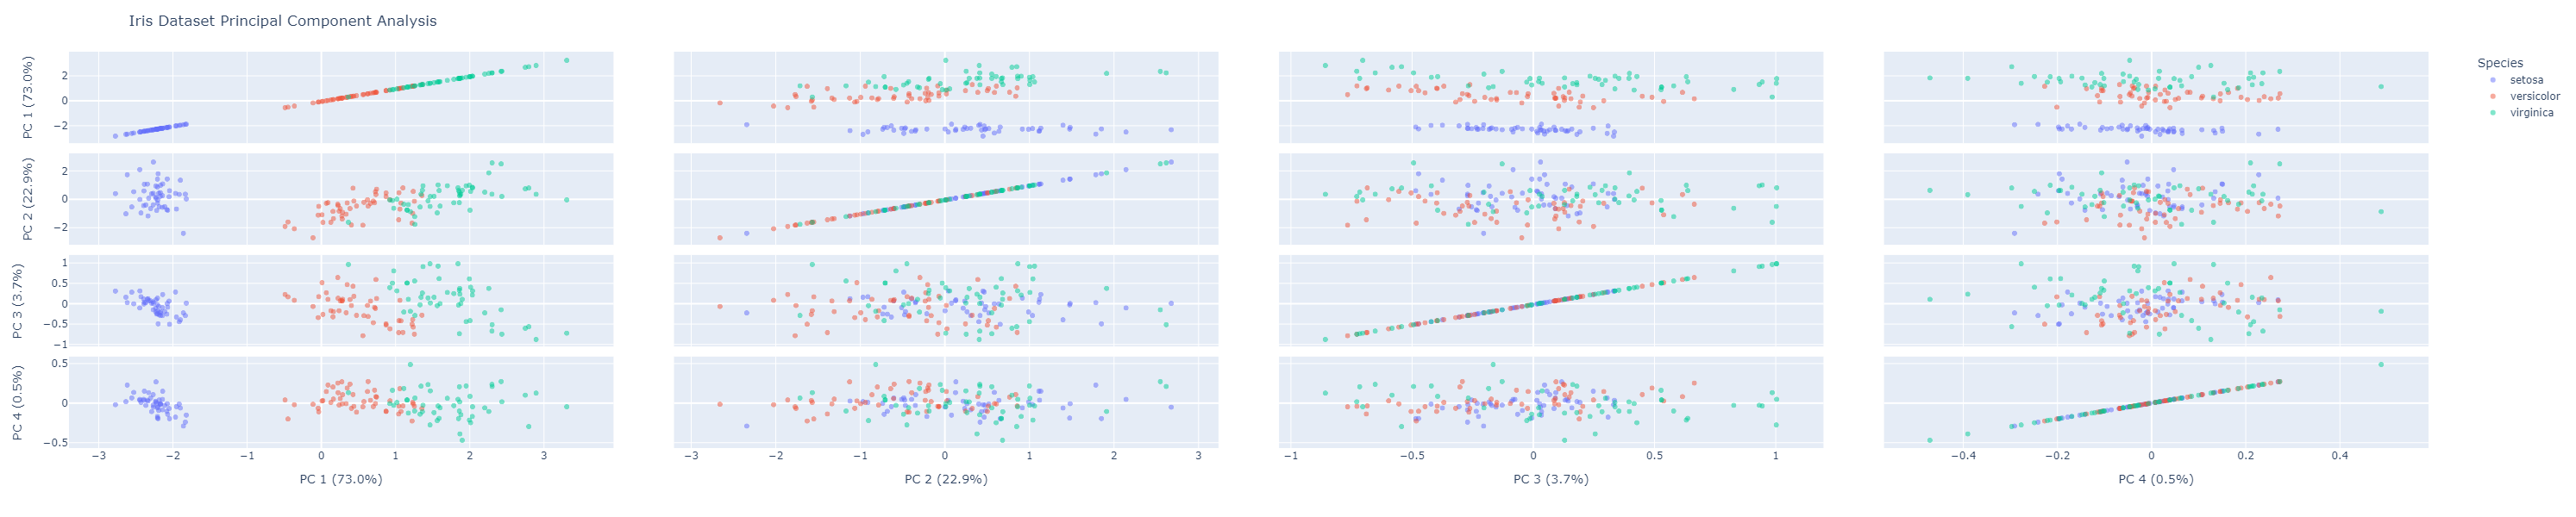

In [89]:
#create Scatter matrix of PCA plots
fig = px.scatter_matrix(
    iris_pca,
    dimensions = pca_features,
    labels = {pca_features[i]: f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)},
    color = 'Species',
    opacity = 0.5
)
fig.update_layout(
    title = "Iris Dataset Principal Component Analysis",
    height= 600
)
fig.show()

From the scatter matrix it is appearant that PCA 1 best seperates the species.

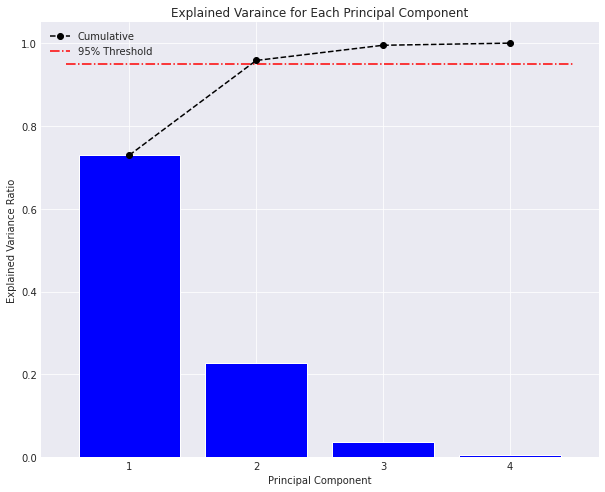

In [175]:
# Plot the explained variance of the Principal Component
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,8))
plt.plot(range(1,5),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='black', label='Cumulative')
plt.bar(range(1,5),pca.explained_variance_ratio_, color = 'blue')
plt.hlines(0.95,xmin=0.5,xmax=4.5, color='red', linestyle='-.', label='95% Threshold')
plt.xticks(range(1,5))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title("Explained Varaince for Each Principal Component")
plt.legend()
plt.show()

Since two principal components explain over 95% of the variance in the dataset we will be using the first two principal components when clustering.

## ClusteringFrom the scatter matrix it is appearant that PCA 1 best seperates the species.

In [90]:
initial_metrics = {'clusters':[],'cal_har_K': [], 'davies_K': [], 'sil_K': [], 'cal_har_Spec': [], 'davies_Spec': [], 'sil_Spec': [], 'cal_har_Guas': [], 'davies_Guas': [], 'sil_Guas': [], 'cal_har_KMeans': [], 'davies_KMeans': [], 'sil_KMeans': [], 'cal_har_Agglom': [], 'davies_Agglom': [], 'sil_Agglom': []}
for n in range(2,11):
    minik = MiniBatchKMeans(n_clusters = n)
    spec = SpectralClustering(n_clusters = n)
    guas = GaussianMixture(n_components = n)
    kmeans = KMeans(n_clusters=n)
    agglom = AgglomerativeClustering(n_clusters=n)
    preds_k = minik.fit_predict(iris_pca[features])
    preds_spec = spec.fit_predict(iris_pca[features])
    preds_guas = guas.fit_predict(iris_pca[features])
    preds_kmeans = kmeans.fit_predict(iris_pca[features])
    preds_agglom = agglom.fit_predict(iris_pca[features])

    initial_metrics['clusters'].append(n)
    initial_metrics['cal_har_Spec'].append(calinski_harabasz_score(iris_pca[features], preds_spec))
    initial_metrics['cal_har_K'].append(calinski_harabasz_score(iris_pca[features], preds_k))
    initial_metrics['cal_har_Agglom'].append(calinski_harabasz_score(iris_pca[features], preds_agglom))
    initial_metrics['cal_har_KMeans'].append(calinski_harabasz_score(iris_pca[features], preds_kmeans))
    initial_metrics['cal_har_Guas'].append(calinski_harabasz_score(iris_pca[features], preds_guas))
    initial_metrics['davies_K'].append(davies_bouldin_score(iris_pca[features], preds_k))
    initial_metrics['davies_Spec'].append(davies_bouldin_score(iris_pca[features], preds_spec))
    initial_metrics['davies_Guas'].append(davies_bouldin_score(iris_pca[features], preds_guas))
    initial_metrics['davies_KMeans'].append(davies_bouldin_score(iris_pca[features], preds_kmeans))
    initial_metrics['davies_Agglom'].append(davies_bouldin_score(iris_pca[features], preds_agglom))
    initial_metrics['sil_K'].append(silhouette_score(iris_pca[features], preds_k))
    initial_metrics['sil_Spec'].append(silhouette_score(iris_pca[features], preds_spec))
    initial_metrics['sil_Guas'].append(silhouette_score(iris_pca[features], preds_guas))
    initial_metrics['sil_KMeans'].append(silhouette_score(iris_pca[features], preds_kmeans))
    initial_metrics['sil_Agglom'].append(silhouette_score(iris_pca[features], preds_agglom))

initial_metrics = pd.DataFrame(initial_metrics).set_index('clusters')
initial_metrics

p = figure(title='Calinski Harabasz Score', x_axis_label='Number of Clusters', y_axis_label='Score')
p.add_tools(HoverTool(
    tooltips=[('Clusters', '@clusters')]))
r1 = p.line('clusters','cal_har_K', source=initial_metrics, legend_label='Mini Batch KMeans', line_width = 2)
c1 = p.circle('clusters','cal_har_K', source=initial_metrics, size= 5)
r2 = p.line('clusters','cal_har_Spec', source=initial_metrics, legend_label = 'Spectral', color = 'red', line_width = 2)
c2 = p.circle('clusters','cal_har_Spec', source=initial_metrics, color='red', size= 5)
r3 = p.line('clusters','cal_har_Guas', source=initial_metrics, legend_label='Guassian Mixture', color='green', line_width = 2)
c3 = p.circle('clusters','cal_har_Guas', source=initial_metrics, color='green', size=5)
r4 = p.line('clusters','cal_har_KMeans', source=initial_metrics, legend_label='KMeans', color='purple', line_width = 2)
c4 = p.circle('clusters','cal_har_KMeans', source=initial_metrics, color='purple', size=5)
r5 = p.line('clusters','cal_har_Agglom', source=initial_metrics, legend_label='Agglomerative', color='orange', line_width = 2)
c5 = p.circle('clusters','cal_har_Agglom', source=initial_metrics, color='orange', size=5)
sel_metric = Select(title="Metric", options=['Calinski Harabasz','Davies Bouldin', 'Silhouette'], value='Calinski Harabasz') 
handm = CustomJS(args=dict(p = p.title, r1 = r1, r2 = r2, r3 = r3, c1 = c1, c2 = c2, c3 = c3, r4= r4, c4=c4, r5 = r5, c5 = c5),
    code="""
    if (cb_obj.value == 'Calinski Harabasz'){
        p.text= 'Calinski Harabasz Score';
        r1.glyph.y = {field:'cal_har_K'};
        c1.glyph.y = {field:'cal_har_K'};
        r2.glyph.y = {field:'cal_har_Spec'};
        c2.glyph.y = {field:'cal_har_Spec'};
        r3.glyph.y = {field:'cal_har_Guas'};
        c3.glyph.y = {field:'cal_har_Guas'};
        r4.glyph.y = {field:'cal_har_KMeans'};
        c4.glyph.y = {field:'cal_har_KMeans'};
        r5.glyph.y = {field:'cal_har_Agglom'};
        c5.glyph.y = {field:'cal_har_Agglom'};
    } else if (cb_obj.value == 'Davies Bouldin'){
        p.text = 'Davies Bouldin Score';
        r1.glyph.y = {field:'davies_K'};
        c1.glyph.y = {field:'davies_K'};
        r2.glyph.y = {field:'davies_Spec'};
        c2.glyph.y = {field:'davies_Spec'};
        r3.glyph.y = {field:'davies_Guas'};
        c3.glyph.y = {field:'davies_Guas'};
        r4.glyph.y = {field:'davies_KMeans'};
        c4.glyph.y = {field:'davies_KMeans'};
        r5.glyph.y = {field:'davies_Agglom'};
        c5.glyph.y = {field:'davies_Agglom'};
    } else if (cb_obj.value == 'Silhouette'){
        p.text = 'Silhouette Score';
        r1.glyph.y = {field:'sil_K'};
        c1.glyph.y = {field:'sil_K'};
        r2.glyph.y = {field:'sil_Spec'};
        c2.glyph.y = {field:'sil_Spec'};
        r3.glyph.y = {field:'sil_Guas'};
        c3.glyph.y = {field:'sil_Guas'};
        r4.glyph.y = {field:'sil_KMeans'};
        c4.glyph.y = {field:'sil_KMeans'};
        r5.glyph.y = {field:'sil_Agglom'};
        c5.glyph.y = {field:'sil_Agglom'};
    } 
    """)
sel_metric.js_on_change("value", handm)
show(row(p, sel_metric))
initial_metrics.columns = pd.MultiIndex.from_arrays([['Mini Batch K', 'Mini Batch K', 'Mini Batch K', 'Spectral', 'Spectral', 'Spectral', 'Guassian Mixture', 'Guassian Mixture', 'Guassian Mixture', 'K Means', 'K Means', 'K Means' , 'Agglomerative', 'Agglomerative', 'Agglomerative'],['Calinski Harabasz', 'Davies Bouldin', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'Silhouette']], names=('Algorithm', 'Metric'))

These are clustering metrics allows you to determine the optimal number of clusters to generate a given clustring technique. 

Calinski Harabasz - The optimal number of clusters for this technique are where the score is the highest. The Calinski Harabasz score is the ratio of the between cluster dispersion and the within cluster dispersion.

Davies Bouldin - The optimal number of clusters for this technique are where the score is the lowest. The Davies Bouldin score tells us the average similarity between clusters by measuring the distance between clusters and the size of the clusters.

Silhouette - The optimal number of clusters for this technique are where the score is the highest. The Silhouette score measures the distance between a point and all other points in its cluster and the distance between a point and all other points not in its cluster.

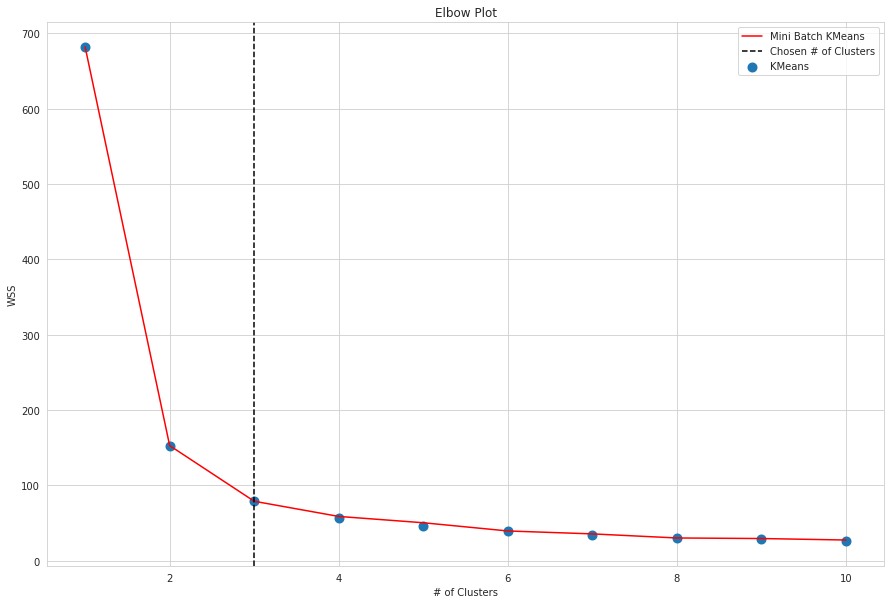

In [91]:
k_score = []
km_score = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n)
    k_score.append(kmeans.fit(iris_pca[features]).inertia_)
    min_k = MiniBatchKMeans(n_clusters = n)
    km_score.append(min_k.fit(iris_pca[features]).inertia_)
fig, _ = plt.subplots(figsize= (15,10))
plt.scatter(range(1,11),k_score, label='KMeans', lw=4)
plt.plot(range(1,11), km_score, color='red', label='Mini Batch KMeans')
plt.title('Elbow Plot')
plt.axvline(x=3, linestyle = '--', color='black' , label='Chosen # of Clusters')
plt.legend()
plt.ylabel('WSS')
plt.xlabel('# of Clusters')
plt.show()


The elbow plot tells us the optimal number of clusters for KMeans and Mini Batch Kmeans is 3.

In [176]:
predictions = pd.DataFrame()
minik = MiniBatchKMeans(n_clusters = 3)
spec = SpectralClustering(n_clusters = 3)
kmeans = KMeans(n_clusters=3)
agglom = AgglomerativeClustering(n_clusters=3)
affinity = AffinityPropagation(damping=.5, random_state = None)
birch = Birch(threshold = .01, n_clusters = 3)
dbscan = DBSCAN(eps=0.45 , min_samples=10)
meshift = MeanShift(bandwidth=0.85)

guas = GaussianMixture(n_components=3)
optics = OPTICS(min_samples=7)
predictions['K'] = minik.fit_predict(iris_pca[features])
predictions['MeShift'] = meshift.fit_predict(iris_pca[features])
predictions['Optics'] = optics.fit_predict(iris_pca[features])
predictions['Spectral'] = spec.fit_predict(iris_pca[features])
predictions['Guas'] = guas.fit_predict(iris_pca[features])
predictions['KMeans'] = kmeans.fit_predict(iris_pca[features])
predictions['Agglom'] = agglom.fit_predict(iris_pca[features])
predictions['Affinity'] = affinity.fit_predict(iris_pca[features])
predictions['Birch'] = birch.fit_predict(iris[features])
predictions['DBSCAN'] = dbscan.fit_predict(iris[features])

guas = GaussianMixture(n_components=3, means_init = [(-2, 0),(0.5, -0.5), (2,1)])
optics = OPTICS(min_samples=10)
predictions['K_PCA'] = minik.fit_predict(iris_pca[pca_features[:2]])
predictions['MeShift_PCA'] = meshift.fit_predict(iris_pca[pca_features[:2]])
predictions['Optics_PCA'] = optics.fit_predict(iris_pca[pca_features[:2]])
predictions['Spectral_PCA'] = spec.fit_predict(iris_pca[pca_features[:2]])
predictions['Guas_PCA'] = guas.fit_predict(iris_pca[pca_features[:2]])
predictions['KMeans_PCA'] = kmeans.fit_predict(iris_pca[pca_features[:2]])
predictions['Agglom_PCA'] = agglom.fit_predict(iris_pca[pca_features[:2]])
predictions['Affinity_PCA'] = affinity.fit_predict(iris_pca[pca_features[:2]])
predictions['Birch_PCA'] = birch.fit_predict(iris_pca[pca_features[:2]])
predictions['DBSCAN_PCA'] = dbscan.fit_predict(iris_pca[pca_features[:2]])

In [93]:
mets = pd.DataFrame()
mets['Rand'] = predictions.apply(lambda x: adjusted_rand_score(x, iris.Species))
mets['Fowl'] = predictions.apply(lambda x: fowlkes_mallows_score(x, iris.Species))
mets['Info'] = predictions.apply(lambda x: adjusted_mutual_info_score(x, iris.Species))
mets['Hom'] = predictions.apply(lambda x: homogeneity_completeness_v_measure(x, iris.Species)[0])
mets['Comp'] = predictions.apply(lambda x: homogeneity_completeness_v_measure(x, iris.Species)[1])
mets['V'] = predictions.apply(lambda x: homogeneity_completeness_v_measure(x, iris.Species)[2])
mets.index = pd.MultiIndex.from_arrays([['Mini Batch K', 'MeanShift', 'Optics', 'Spectral', 'Guassian Mixture', 'KMeans', 'Agglommerative', 'Affinity', 'Birch', 'DBSCAN', 'Mini Batch K', 'MeanShift', 'Optics', 'Spectral', 'Guassian Mixture', 'KMeans', 'Agglommerative', 'Affinity', 'Birch', 'DBSCAN'], ['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal','PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA']], names=('Feature Type', 'Algorithm'))
mets.sort_index(level=0, inplace =True)
mets

Rand      Fowl      Info       Hom      Comp  \
Feature Type     Algorithm                                                     
Affinity         Normal     0.481172  0.634687  0.659933  0.527822  0.914941   
                 PCA        0.322908  0.499622  0.537387  0.420434  0.811728   
Agglommerative   Normal     0.731199  0.822170  0.767167  0.779596  0.760801   
                 PCA        0.586073  0.724496  0.638216  0.647554  0.637967   
Birch            Normal     0.731199  0.822170  0.767167  0.779596  0.760801   
                 PCA        0.703744  0.803191  0.731271  0.741224  0.728143   
DBSCAN           Normal     0.464623  0.632696  0.574658  0.528573  0.653593   
                 PCA        0.416447  0.629191  0.489995  0.520953  0.474466   
Guassian Mixture Normal     0.903874  0.935599  0.898436  0.901065  0.898326   
                 PCA        0.772631  0.848726  0.791524  0.800089  0.788243   
KMeans           Normal     0.730238  0.820808  0.755119  0.764986  0.751485   
                 PCA        0.601129  0.732750  0.643460  0.648862  0.646890   
MeanShift        Normal     0.743683  0.829449  0.763083  0.771792  0.760365   
                 PCA        0.577703  0.710679  0.603797  0.570666  0.664305   
Mini Batch K     Normal     0.801880  0.867259  0.793345  0.797117  0.794694   
                 PCA        0.592333  0.727060  0.638175  0.644072  0.641251   
Optics           Normal     0.131889  0.460232  0.351629  0.356611  0.390151   
                 PCA        0.152492  0.443922  0.357767  0.345334  0.405154   
Spectral         Normal     0.745504  0.832050  0.795421  0.809369  0.786923   
                 PCA        0.620135  0.745211  0.655223  0.659848  0.659127   

                                   V  
Feature Type     Algorithm            
Affinity         Normal     0.669446  
                 PCA        0.553950  
Agglommerative   Normal     0.770084  
                 PCA        0.642725  
Birch            Normal     0.770084  
                 PCA        0.734625  
DBSCAN           Normal     0.584472  
                 PCA        0.496624  
Guassian Mixture Normal     0.899694  
                 PCA        0.794122  
KMeans           Normal     0.758176  
                 PCA        0.647874  
MeanShift        Normal     0.766036  
                 PCA        0.613935  
Mini Batch K     Normal     0.795904  
                 PCA        0.642658  
Optics           Normal     0.372628  
                 PCA        0.372860  
Spectral         Normal     0.797989  
                 PCA        0.659487

In [94]:
source = ColumnDataSource(data=dict(x=mets.index, Rand=mets.Rand, Fowl=mets.Fowl, Info=mets.Info, Hom=mets.Hom, Comp=mets.Comp, V=mets.V))
p = figure(x_range = FactorRange(*mets.index), title='Adjusted Rand', y_axis_label= 'Score', plot_width =1000)
p.xaxis.major_label_orientation = 3.14/2
p.add_tools(HoverTool(
    tooltips=[('Adjusted Rand', '@Rand{(0.000)}'),
              ('Adjusted Mutual Info', '@Info{(0.000)}'),
              ('Fowlkes Mallows', '@Fowl{(0.000)}'),
              ('Homogenity', '@Hom{(0.000)}'),
              ('Completeness', '@Comp{(0.000)}'),
              ('V-Measure', '@V{(0.000)}')]))
r = p.vbar(x='x', top = 'Rand', source=source, fill_color=factor_cmap('x', palette = ['blue', 'red'], factors =['PCA', 'Normal'], start=1, end=2), width =0.9)
sel_metric = Select(title='Metric', value='Adjusted Rand Score', options=['Adjusted Rand Score','Fowlkes Mallows Score', 'Homogeneity Score', 'Completeness Score', 'V-Measure Score', 'Adjusted Mutual Info Score'])
handm = CustomJS(args = dict(r = r, p = p.title), 
    code = """
        if (cb_obj.value == 'Adjusted Rand Score'){
            r.glyph.top = {field:'Rand'};
            p.text = 'Adjusted Rand';
        } else if (cb_obj.value == 'Fowlkes Mallows Score'){
            r.glyph.top = {field:'Fowl'};
            p.text = 'Fowlkes Mallows';
        } else if (cb_obj.value == 'Homogeneity Score'){
            r.glyph.top = {field:'Hom'};
            p.text = 'Homogeneity';
        } else if (cb_obj.value == 'Completeness Score'){
            r.glyph.top = {field:'Comp'};
            p.text = 'Completeness';
        } else if (cb_obj.value == 'V-Measure Score'){
            r.glyph.top = {field:'V'};
            p.text = 'V-Measure';
        } else if (cb_obj.value == 'Adjusted Mutual Info Score'){
            r.glyph.top = {field:'Info'};
            p.text = 'Adjusted Mutual Information';
        }
    """
    )
sel_metric.js_on_change("value", handm)
show(row(p, sel_metric))

Across all metrics the Guassian Mixture model performed the best while the Optics model performed the worst. This was true for both PCA and Non-PCA.

Except for two metrics with Optics clustering PCA always performed slightly lower then the normal features. In this analysis the appeal to use PCA is not there because we have only a few features but in datasets with many features it could significantly improve performance with getting good and quick results. 


In [97]:
iris_preds = pd.concat([iris_pca, predictions], axis =1)
def map_predictions(x, y):
    try:
        x = x.where(x > -1, np.nan)
        setosa = int(x[y == 'setosa'].mode())
        virginica = int(x[y == 'virginica'].mode())
        versicolor = int(x[y == 'versicolor'].mode())

        return x.map({setosa:'setosa', virginica:'virginica', versicolor:'versicolor'})
    except:
        print("hello", x)
iris_preds.iloc[:,10:] = iris_preds.iloc[:,10:].apply(lambda X: map_predictions(X, iris_preds.Species), axis = 0)
iris_preds.fillna('Noise', inplace =True)
iris_preds.sample(10)

,Species,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3,PCA4,K,...,K_PCA,MeShift_PCA,Optics_PCA,Spectral_PCA,Guas_PCA,KMeans_PCA,Agglom_PCA,Affinity_PCA,Birch_PCA,DBSCAN_PCA
125,virginica,7.2,3.2,6.0,1.8,1.954327,1.007778,-0.419985,0.218338,1,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,versicolor
69,versicolor,5.6,2.5,3.9,1.1,0.164918,-1.302609,-0.172838,0.051727,2,...,versicolor,versicolor,Noise,versicolor,versicolor,versicolor,versicolor,Noise,versicolor,versicolor
92,versicolor,5.8,2.6,4.0,1.2,0.336530,-0.988404,-0.199390,-0.006531,2,...,versicolor,versicolor,Noise,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
1,setosa,4.9,3.0,1.4,0.2,-2.080961,-0.674134,-0.234609,-0.103007,0,...,setosa,setosa,Noise,setosa,setosa,setosa,setosa,Noise,setosa,setosa
77,versicolor,6.7,3.0,5.0,1.7,1.358405,0.331312,-0.260827,-0.066828,1,...,virginica,virginica,Noise,virginica,virginica,virginica,virginica,Noise,virginica,versicolor
58,versicolor,6.6,2.9,4.6,1.3,0.927902,0.032226,-0.596169,0.029880,2,...,versicolor,versicolor,versicolor,versicolor,virginica,versicolor,versicolor,Noise,virginica,versicolor
5,setosa,5.4,3.9,1.7,0.4,-2.075631,1.489178,0.026968,-0.006608,0,...,setosa,setosa,Noise,setosa,setosa,setosa,setosa,Noise,setosa,Noise
29,setosa,4.7,3.2,1.6,0.2,-2.265261,-0.337732,0.068436,0.108280,0,...,setosa,setosa,Noise,setosa,setosa,setosa,setosa,Noise,setosa,setosa
120,virginica,6.9,3.2,5.7,2.3,2.037716,0.910467,0.234799,-0.167951,1,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,versicolor
98,versicolor,5.1,2.5,3.0,1.1,-0.447667,-1.543792,0.190401,-0.199946,2,...,versicolor,Noise,Noise,versicolor,versicolor,versicolor,versicolor,Noise,versicolor,Noise


Because clustering techniques do not output a consistent identifier for each cluster we created a maping function that will identify the proper cluster label. This will make it so we can us "setosa", "virginica", and "versicolor" in a further analysis.

We chose to represent predictions not classified in certain clustering techniques as "Noise".

## Visualize Clustering Outputs

In [98]:
from bokeh.models import Legend, LegendItem
from bokeh.transform import factor_mark
from bokeh.layouts import layout
cmap = factor_cmap('KMeans_PCA', ['red', 'blue', 'green', 'black'], ['versicolor','virginica','setosa', 'Noise'])
p = figure(title = 'Clustering Predictions with PCA (KMeans)', x_axis_label = 'PCA 1', y_axis_label='PCA 2')
r = p.circle('PCA1', 'PCA2', source =iris_preds, color=cmap, size=10, alpha=0.5, legend_field= "KMeans_PCA")
opts =[[("Prediction", "@KMeans_PCA")],
        [("Prediction", "@K_PCA")],
        [("Prediction", "@Guas_PCA")],
        [("Prediction", "@MeShift_PCA")],
        [("Prediction", "@Spectral_PCA")],
        [("Prediction", "@Agglom_PCA")],
        [("Prediction", "@Birch_PCA")],
        [("Prediction", "@Affinity_PCA")],
        [("Prediction", "@DBSCAN_PCA")],
        [("Prediction", "@Optics_PCA")]]
p.add_tools(HoverTool(
    tooltips = opts[0]
))
p.legend.location = "top"
sel_alg = Select(title = "Algorithm", options =["KMeans", "MiniBatch KMeans", "Guassian Mixture", "Meanshift", "Spectral", "Agglomerative", "Birch", "Affinity", "DBSCAN", "Optics"], value="KMeans")
handalg = CustomJS(args=dict(cmap = cmap['transform'], r  = r, hov = p.hover[0], options = opts, title = p.title),
    code = """
    if (cb_obj.value == "KMeans"){
        r.glyph.fill_color = {field: 'KMeans_PCA', transform : cmap};
        r.glyph.line_color = {field: 'KMeans_PCA', transform : cmap};
        hov.tooltips = options[0];
        title.text = 'Clustering Predictions with PCA (KMeans)';
    } else if (cb_obj.value == "MiniBatch KMeans"){
        r.glyph.fill_color = {field: 'K_PCA', transform : cmap};
        r.glyph.line_color = {field: 'K_PCA', transform : cmap};
        hov.tooltips = options[1];
        title.text = 'Clustering Predictions with PCA (Mini Batch KMeans)';
    } else if (cb_obj.value == "Guassian Mixture"){
        r.glyph.fill_color = {field: 'Guas_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Guas_PCA', transform : cmap};
        hov.tooltips = options[2];
        title.text = 'Clustering Predictions with PCA (Guassian Mixture)';
    } else if (cb_obj.value == "Meanshift"){
        r.glyph.fill_color = {field: 'MeShift_PCA', transform : cmap};
        r.glyph.line_color = {field: 'MeShift_PCA', transform : cmap};
        hov.tooltips = options[3];
        title.text = 'Clustering Predictions with PCA (Mean-Shift)';
    } else if (cb_obj.value == "Spectral"){
        r.glyph.fill_color = {field: 'Spectral_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Spectral_PCA', transform : cmap};
        hov.tooltips = options[4];
        title.text = 'Clustering Predictions with PCA (Spectral Clustering)';
    } else if (cb_obj.value == "Agglomerative"){
        r.glyph.fill_color = {field: 'Agglom_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Agglom_PCA', transform : cmap};
        hov.tooltips = options[5];
        title.text = 'Clustering Predictions with PCA (Agglomeraative Clustering)';
    } else if (cb_obj.value == "Birch"){
        r.glyph.fill_color = {field: 'Birch_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Birch_PCA', transform : cmap};
        hov.tooltips = options[6];
        title.text = 'Clustering Predictions with PCA (BIRCH)';
    } else if (cb_obj.value == "Affinity"){
        r.glyph.fill_color = {field: 'Affinity_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Affinity_PCA', transform : cmap};
        hov.tooltips = options[7];
        title.text = 'Clustering Predictions with PCA (Affinity Propagation)';
    } else if (cb_obj.value == "DBSCAN"){
        r.glyph.fill_color = {field: 'DBSCAN_PCA', transform : cmap};
        r.glyph.line_color = {field: 'DBSCAN_PCA', transform : cmap};
        hov.tooltips = options[8];
        title.text = 'Clustering Predictions with PCA (DBSCAN)';
    } else if (cb_obj.value == "Optics"){
        r.glyph.fill_color = {field: 'Optics_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Optics_PCA', transform : cmap};
        hov.tooltips = options[9];
        title.text = 'Clustering Predictions with PCA (OPTICS)';
    }
    """)
sel_alg.js_on_change("value", handalg)
show(row(p, sel_alg))

The above visualization represents the cluster choices for the Principal Components

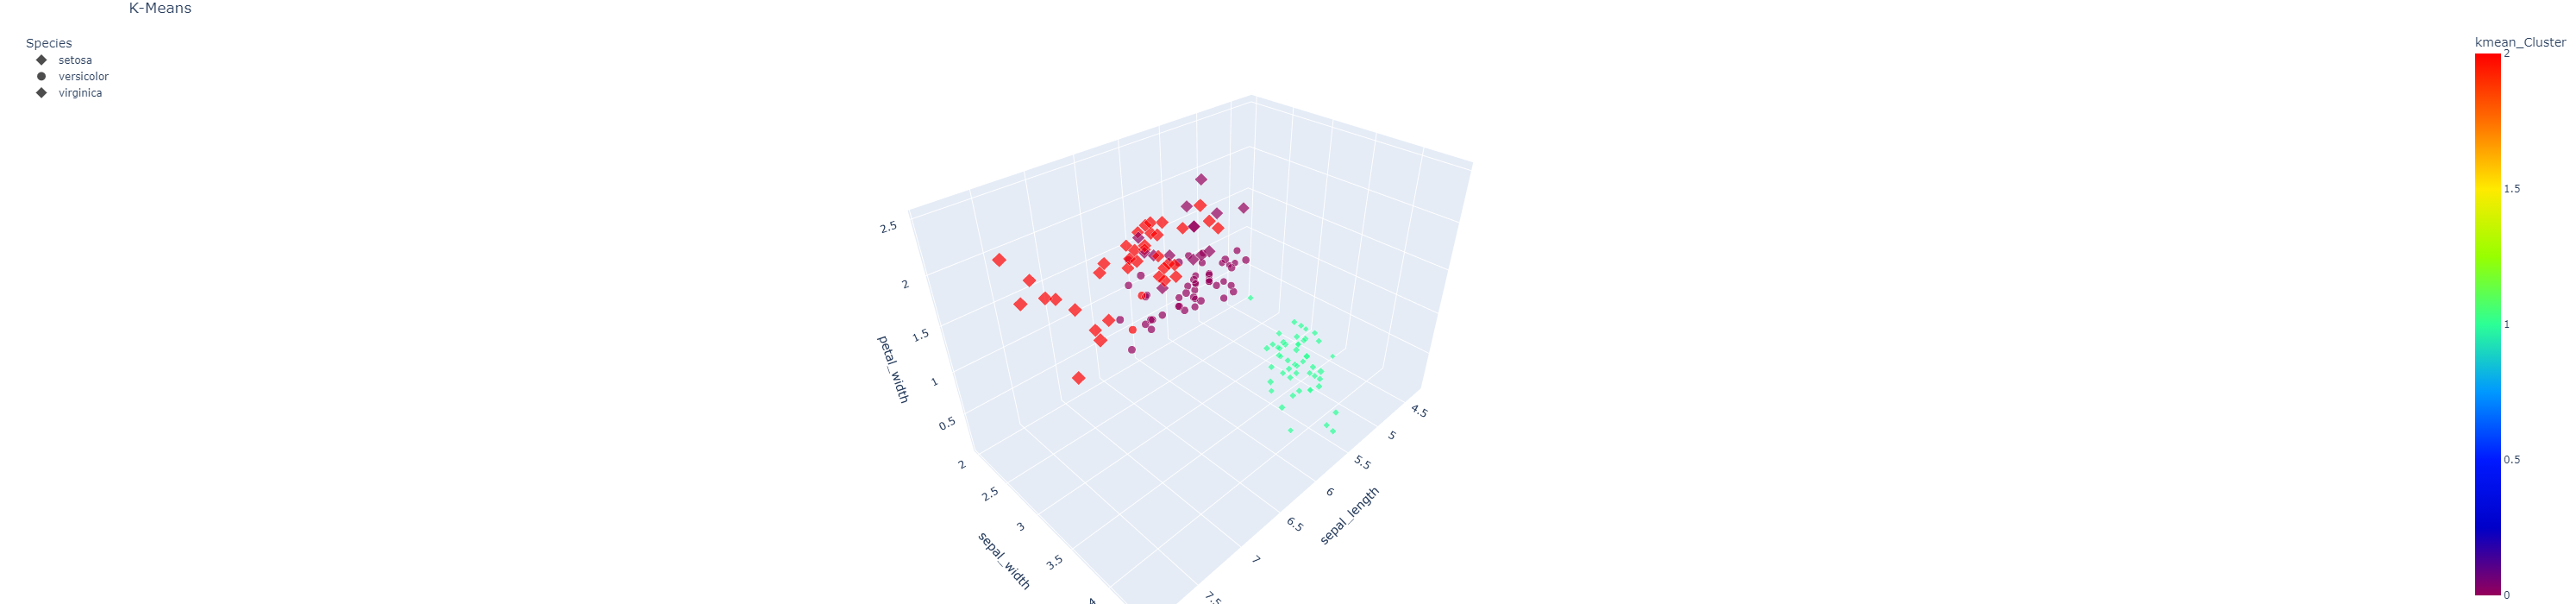

In [177]:
kmean_model = KMeans(n_clusters=3)
iris_preds['kmean_Cluster'] = kmean_model.fit_predict(iris_preds[features])

multi_plot = px.scatter_3d(iris_preds , x='sepal_length', y='sepal_width', z='petal_width', color='kmean_Cluster', size='petal_length', size_max=18, symbol='Species', opacity=0.7 , color_continuous_scale=px.colors.sequential.Rainbow, title='K-Means')
multi_plot.update_layout(margin=dict(l=0, r=0, b=0, t=30),width=1000, height=700,legend=dict( yanchor="top", y=0.99, xanchor="left", x=0.01 ) ) 
symbols = {'setosa': 'diamond', 'versicolor':'circle', 'virginica':'diamond'}

for i, d in enumerate(multi_plot.data):
    multi_plot.data[i].marker.symbol = symbols[multi_plot.data[i].name]
    
multi_plot.show()

The above visualization represents the combination of clustering and categorization in 3D form and clustering error is visible by inferring the cluster and matching it against the Species for the Non-PCA features with K-Means clustering.

In [101]:
from bokeh.models import Legend, LegendItem
from bokeh.transform import factor_mark
from bokeh.layouts import layout
cmap = factor_cmap('KMeans_PCA', ['red', 'blue', 'green', 'black'], ['versicolor','virginica','setosa', 'Noise'])
mark = factor_mark('Species', ['circle', 'square', 'triangle'], ['versicolor','virginica','setosa'])
p = figure(title = 'Clustering Predictions with PCA (KMeans)', x_axis_label = 'PCA 1', y_axis_label='PCA 2')
r = p.scatter('PCA1', 'PCA2', source =iris_preds, color=cmap, marker = mark, size=10, alpha=0.5)
rm = p.scatter(0,0, color = 'black', marker = ['circle', 'square', 'triangle'])
rm.visible = False
legend1 = Legend(items = [
    LegendItem(label='versicolor',renderers =  [rm], index=0),
    LegendItem(label='virginica',renderers =  [rm], index=1),
    LegendItem(label='setosa',renderers =  [rm], index=2),
    ], title = 'Actual Labels (Shape)', location ="bottom_right", orientation ='horizontal')
rs = p.diamond(0,0, color = ['red', 'blue', 'green', 'black'])
rs.visible = False
legend2 = Legend(items = [
    LegendItem(label='versicolor',renderers =  [rs], index=0),
    LegendItem(label='virginica',renderers =  [rs], index=1),
    LegendItem(label='setosa',renderers =  [rs], index=2),
    LegendItem(label='Noise',renderers =  [rs], index=3)
    ], title = 'Predicted Labels (Color)', location='bottom_right', orientation= 'horizontal')
p.add_layout(legend2, "below")
p.add_layout(legend1)
opts =[[("Prediction", "@KMeans_PCA"),("Actual", "@Species")],
        [("Prediction", "@K_PCA"),("Actual", "@Species")],
        [("Prediction", "@Guas_PCA"),("Actual", "@Species")],
        [("Prediction", "@MeShift_PCA"),("Actual", "@Species")],
        [("Prediction", "@Spectral_PCA"),("Actual", "@Species")],
        [("Prediction", "@Agglom_PCA"),("Actual", "@Species")],
        [("Prediction", "@Birch_PCA"),("Actual", "@Species")],
        [("Prediction", "@Affinity_PCA"),("Actual", "@Species")],
        [("Prediction", "@DBSCAN_PCA"),("Actual", "@Species")],
        [("Prediction", "@Optics_PCA"),("Actual", "@Species")]]
p.add_tools(HoverTool(
    tooltips = opts[0]
))
sel_alg = Select(title = "Algorithm", options =["KMeans", "MiniBatch KMeans", "Guassian Mixture", "Meanshift", "Spectral", "Agglomerative", "Birch", "Affinity", "DBSCAN", "Optics"], value="KMeans")
handalg = CustomJS(args=dict(cmap = cmap['transform'], r  = r, hov = p.hover[0], options = opts, title = p.title),
    code = """
    if (cb_obj.value == "KMeans"){
        r.glyph.fill_color = {field: 'KMeans_PCA', transform : cmap};
        r.glyph.line_color = {field: 'KMeans_PCA', transform : cmap};
        hov.tooltips = options[0];
        title.text = 'Clustering Predictions with PCA (KMeans)';
    } else if (cb_obj.value == "MiniBatch KMeans"){
        r.glyph.fill_color = {field: 'K_PCA', transform : cmap};
        r.glyph.line_color = {field: 'K_PCA', transform : cmap};
        hov.tooltips = options[1];
        title.text = 'Clustering Predictions with PCA (Mini Batch KMeans)';
    } else if (cb_obj.value == "Guassian Mixture"){
        r.glyph.fill_color = {field: 'Guas_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Guas_PCA', transform : cmap};
        hov.tooltips = options[2];
        title.text = 'Clustering Predictions with PCA (Guassian Mixture)';
    } else if (cb_obj.value == "Meanshift"){
        r.glyph.fill_color = {field: 'MeShift_PCA', transform : cmap};
        r.glyph.line_color = {field: 'MeShift_PCA', transform : cmap};
        hov.tooltips = options[3];
        title.text = 'Clustering Predictions with PCA (Mean-Shift)';
    } else if (cb_obj.value == "Spectral"){
        r.glyph.fill_color = {field: 'Spectral_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Spectral_PCA', transform : cmap};
        hov.tooltips = options[4];
        title.text = 'Clustering Predictions with PCA (Spectral Clustering)';
    } else if (cb_obj.value == "Agglomerative"){
        r.glyph.fill_color = {field: 'Agglom_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Agglom_PCA', transform : cmap};
        hov.tooltips = options[5];
        title.text = 'Clustering Predictions with PCA (Agglomeraative Clustering)';
    } else if (cb_obj.value == "Birch"){
        r.glyph.fill_color = {field: 'Birch_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Birch_PCA', transform : cmap};
        hov.tooltips = options[6];
        title.text = 'Clustering Predictions with PCA (BIRCH)';
    } else if (cb_obj.value == "Affinity"){
        r.glyph.fill_color = {field: 'Affinity_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Affinity_PCA', transform : cmap};
        hov.tooltips = options[7];
        title.text = 'Clustering Predictions with PCA (Affinity Propagation)';
    } else if (cb_obj.value == "DBSCAN"){
        r.glyph.fill_color = {field: 'DBSCAN_PCA', transform : cmap};
        r.glyph.line_color = {field: 'DBSCAN_PCA', transform : cmap};
        hov.tooltips = options[8];
        title.text = 'Clustering Predictions with PCA (DBSCAN)';
    } else if (cb_obj.value == "Optics"){
        r.glyph.fill_color = {field: 'Optics_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Optics_PCA', transform : cmap};
        hov.tooltips = options[9];
        title.text = 'Clustering Predictions with PCA (OPTICS)';
    }
    """)
sel_alg.js_on_change("value", handalg)
show(row(p, sel_alg))

This plot allows you to see actual vs. predictated labels for all ten clustering techniques fitted with the Principal Components. One way to improve the visualization would be to be able to filter correct and incorrect predictions. This could allow you to see areas between clusters that typically stuggle to be accurate.

In [102]:
cmap = factor_cmap('KMeans_PCA', ['red', 'blue', 'green', 'black'], ['versicolor','virginica','setosa', 'Noise'])
mark = factor_mark('KMeans',  ['circle', 'square', 'triangle', 'star'], ['versicolor','virginica','setosa', 'Noise'])
p = figure(title = 'Normal Features vs. Principal Components(KMeans)', x_axis_label = 'PCA 1', y_axis_label='PCA 2')
r = p.scatter('PCA1', 'PCA2', source =iris_preds, color=cmap, marker = mark, size=10, alpha=0.5)
rm = p.scatter(0,0, color = 'black', marker = ['circle', 'square', 'triangle', 'star'])
rm.visible = False
legend1 = Legend(items = [
    LegendItem(label='versicolor',renderers =  [rm], index=0),
    LegendItem(label='virginica',renderers =  [rm], index=1),
    LegendItem(label='setosa',renderers =  [rm], index=2),
    LegendItem(label='Noise',renderers =  [rm], index=3)
    ], title = 'Normal Features Predictions (Shape)', location =(100,460), orientation = 'horizontal')
rs = p.diamond(0,0, color = ['red', 'blue', 'green', 'black'])
rs.visible = False
legend2 = Legend(items = [
    LegendItem(label='versicolor',renderers =  [rs], index=0),
    LegendItem(label='virginica',renderers =  [rs], index=1),
    LegendItem(label='setosa',renderers =  [rs], index=2),
    LegendItem(label='Noise',renderers =  [rs], index=3)
    ], title = 'Principal Compnonent Predictions (Color)', location=(100,400), orientation = 'horizontal')
p.add_layout(legend2)
p.add_layout(legend1)
opts =[[("PCA", "@KMeans_PCA"),("Normal", "@KMeans")],
        [("PCA", "@K_PCA"),("Normal", "@K")],
        [("PCA", "@Guas_PCA"),("Normal", "@Guas")],
        [("PCA", "@MeShift_PCA"),("Normal", "@MeShift")],
        [("PCA", "@Spectral_PCA"),("Normal", "@Spectral")],
        [("PCA", "@Agglom_PCA"),("Normal", "@Agglom")],
        [("PCA", "@Birch_PCA"),("Normal", "@Birch")],
        [("PCA", "@Affinity_PCA"),("Normal", "@Affinity")],
        [("PCA", "@DBSCAN_PCA"),("Normal", "@DBSCAN")],
        [("PCA", "@Optics_PCA"),("Normal", "@Optics")]]
p.add_tools(HoverTool(
    tooltips = opts[0]
))
sel_alg = Select(title = "Algorithm", options =["KMeans", "MiniBatch KMeans", "Guassian Mixture", "Meanshift", "Spectral", "Agglomerative", "Birch", "Affinity", "DBSCAN", "Optics"], value="KMeans")
handalg = CustomJS(args=dict(cmap = cmap['transform'], mmap = mark['transform'], r  = r, hov = p.hover[0], options = opts, title = p.title),
    code = """
    if (cb_obj.value == "KMeans"){
        r.glyph.fill_color = {field: 'KMeans_PCA', transform : cmap};
        r.glyph.line_color = {field: 'KMeans_PCA', transform : cmap};
        r.glyph.marker = {field: 'KMeans', transform : mmap};
        hov.tooltips = options[0];
        title.text = 'Clustering Predictions with PCA (KMeans)';
    } else if (cb_obj.value == "MiniBatch KMeans"){
        r.glyph.fill_color = {field: 'K_PCA', transform : cmap};
        r.glyph.line_color = {field: 'K_PCA', transform : cmap};
        r.glyph.marker = {field: 'K', transform : mmap};
        hov.tooltips = options[1];
        title.text = 'Clustering Predictions with PCA (Mini Batch KMeans)';
    } else if (cb_obj.value == "Guassian Mixture"){
        r.glyph.fill_color = {field: 'Guas_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Guas_PCA', transform : cmap};
        hov.tooltips = options[2];
        r.glyph.marker = {field: 'Guas', transform : mmap};
        title.text = 'Clustering Predictions with PCA (Guassian Mixture)';
    } else if (cb_obj.value == "Meanshift"){
        r.glyph.fill_color = {field: 'MeShift_PCA', transform : cmap};
        r.glyph.line_color = {field: 'MeShift_PCA', transform : cmap};
        hov.tooltips = options[3];
        r.glyph.marker = {field: 'MeShift', transform : mmap};
        title.text = 'Clustering Predictions with PCA (Mean-Shift)';
    } else if (cb_obj.value == "Spectral"){
        r.glyph.fill_color = {field: 'Spectral_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Spectral_PCA', transform : cmap};
        hov.tooltips = options[4];
        r.glyph.marker = {field: 'Spectral', transform : mmap};
        title.text = 'Clustering Predictions with PCA (Spectral Clustering)';
    } else if (cb_obj.value == "Agglomerative"){
        r.glyph.fill_color = {field: 'Agglom_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Agglom_PCA', transform : cmap};
        hov.tooltips = options[5];
        r.glyph.marker = {field: 'Agglom', transform : mmap};
        title.text = 'Clustering Predictions with PCA (Agglomeraative Clustering)';
    } else if (cb_obj.value == "Birch"){
        r.glyph.fill_color = {field: 'Birch_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Birch_PCA', transform : cmap};
        hov.tooltips = options[6];
        r.glyph.marker = {field: 'Birch', transform : mmap};
        title.text = 'Clustering Predictions with PCA (BIRCH)';
    } else if (cb_obj.value == "Affinity"){
        r.glyph.fill_color = {field: 'Affinity_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Affinity_PCA', transform : cmap};
        hov.tooltips = options[7];
        r.glyph.marker = {field: 'Affinity', transform : mmap};
        title.text = 'Clustering Predictions with PCA (Affinity Propagation)';
    } else if (cb_obj.value == "DBSCAN"){
        r.glyph.fill_color = {field: 'DBSCAN_PCA', transform : cmap};
        r.glyph.line_color = {field: 'DBSCAN_PCA', transform : cmap};
        hov.tooltips = options[8];
        r.glyph.marker = {field: 'DBSCAN', transform : mmap};
        title.text = 'Clustering Predictions with PCA (DBSCAN)';
    } else if (cb_obj.value == "Optics"){
        r.glyph.fill_color = {field: 'Optics_PCA', transform : cmap};
        r.glyph.line_color = {field: 'Optics_PCA', transform : cmap};
        hov.tooltips = options[9];
        r.glyph.marker = {field: 'Optics', transform : mmap};
        title.text = 'Clustering Predictions with PCA (OPTICS)';
    }
    """)
sel_alg.js_on_change("value", handalg)
show(row(p, sel_alg))

The above plots show the difference in predictions for the Principal Component model and the normal feature models. One way to improve the visualization would be to be able to filter between prediction agreements and disagreements. This could allow you to see difference in performance between PCA and non-PCA.

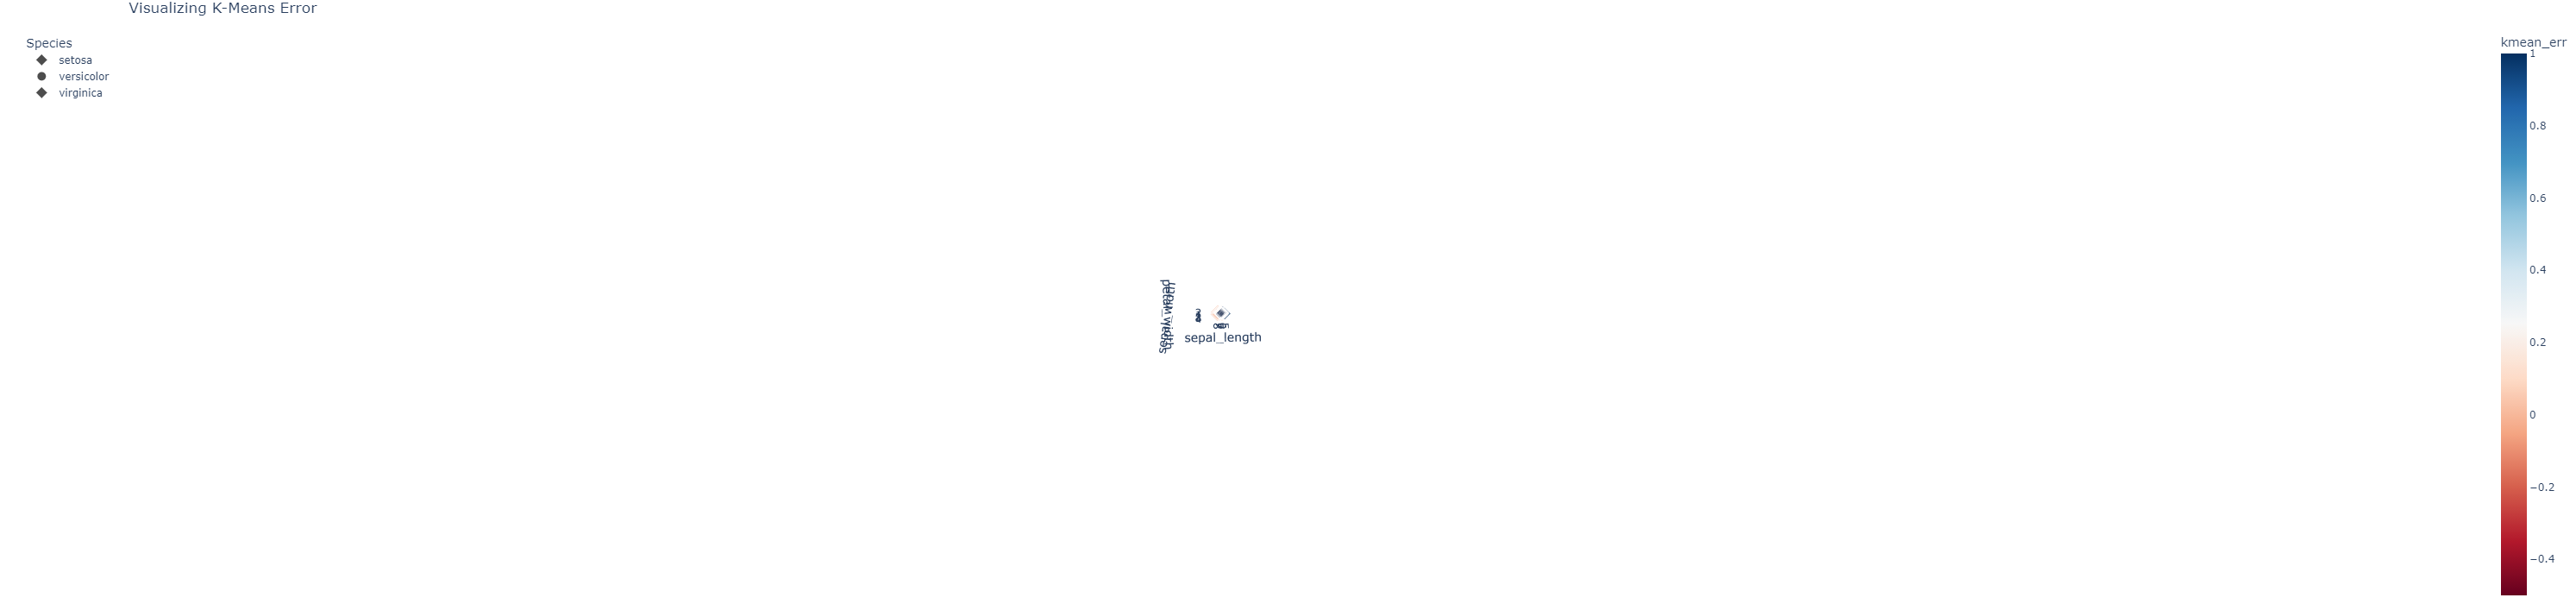

In [179]:
def kmean_clus_err(row):
    if row['kmean_Cluster'] == 2:
        if row['Species'] == 'virginica':
            return 0
        else:
            return 1
    
    elif row['kmean_Cluster'] == 1:
        if row['Species'] == 'setosa':
            return 0
        else:
            return 1
    
    elif row['kmean_Cluster'] == 0:
        if row['Species'] == 'versicolor':
            return 0
        else:
            return 1 
        
iris_preds[ 'kmean_err'] = iris_preds.apply(lambda row: kmean_clus_err(row), axis=1)

multi_plot = px.scatter_3d(iris_preds , x='sepal_length', y='sepal_width', z='petal_width', color='kmean_err', size='petal_length', size_max=18, symbol='Species', opacity=0.7 , color_continuous_scale=px.colors.sequential.RdBu, title='Visualizing K-Means Error')
multi_plot.update_layout(margin=dict(l=0, r=0, b=0, t=30),width=800, height=700,legend=dict( yanchor="top", y=0.99, xanchor="left", x=0.01 ) ) 
symbols = {'setosa': 'diamond', 'versicolor':'circle', 'virginica':'diamond'}

for i, d in enumerate(multi_plot.data):
    multi_plot.data[i].marker.symbol = symbols[multi_plot.data[i].name]
    
multi_plot.show()

This is a great tool to visualize where errors occur across 3 dimensions. Errors are represented by kmean_error = 1. You can really see that the cluster method struggles where "versicolor" and "verginica" meet.

## Classification

In [180]:
import ipywidgets as widgets
import plotly.graph_objects as go
color = iris.Species.map({'virginica':1, 'versicolor':2, 'setosa':3})
colorscale = [[0, 'red'], [0.5, 'blue'], [1, 'green']]
fig_par =go.FigureWidget(go.Parcoords(dimensions=list([dict(label='Petal Length', values=iris.petal_length),
                                           dict(label='Sepal Length', values=iris.sepal_length),
                                           dict(label='Petal Width', values=iris.petal_width),
                                           dict(label='Sepal Width', values=iris.sepal_width)]),
                                line = dict(color=color, colorscale=colorscale, cmax=3, cmin=1)))
fig_par.update_layout(height=400,  
                  width=1500)

fig_scat = go.FigureWidget( go.Scatter(x=iris_pca['PCA1'], 
                                                y=iris_pca['PCA2'],
                                                mode='markers', 
                                                hovertemplate='PCA 1: %{x:.2f}<br>PCA 2: %{y:.2f}',
                                                marker = dict(
                                                    color = color,
                                                    colorscale=colorscale,
                                                    opacity=0.3
                                                ),
                                                unselected={'marker':{'opacity':0.3}},
                                                selected = {'marker':{'opacity':1}}
                                            ))
fig_scat.update_layout(height=500,  
                  width=1500, 
                  title={"text":"Iris Dataset Exploration", 
                         "font":{"color":"black", 
                                  "size":25}},
                  xaxis={'title': 'PCA1'},
                  yaxis={'title': 'PCA2'},
                  dragmode='lasso', 
                  hovermode='closest')

def update_plot(bttn):
    for dim in fig_par.data[0].dimensions: 
        if dim.label == bttn.description:
            if dim.visible == False:
                dim.visible = True
                bttn.button_style='info'
            else:
                dim.visible = False
                bttn.button_style=''

def selection_scat(trace, points, state):
    new_color =  iris.Species.map({'virginica':1, 'versicolor':2, 'setosa':3})
    idx = [not elem in points.point_inds for elem in range(len(iris))]
    new_color[idx] = None
    fig_par.data[0].line.color = new_color

def selection_par(trace, points, state):
    fig_scat.data[0].selectedpoints = points.points_inds

def clear_selection(bttn):
    fig_par.data[0].line.color = iris.Species.map({'virginica':1, 'versicolor':2, 'setosa':3})
    fig_scat.data[0].selectedpoints = None

checks=widgets.VBox([widgets.Label(value="Select Desired Features")])
for col in fig_par.data[0].dimensions:
    new = widgets.Button(description=col.label, button_style='info', layout=widgets.Layout(width='175px'))
    new.on_click(update_plot)
    checks.children = tuple(list(checks.children)+ [new])

clear = widgets.Button(description='Clear Selection', button_style='warning')
clear.on_click(clear_selection)

fig_scat.data[0].on_selection(selection_scat)
fig_par.data[0].on_selection(selection_par)
f= widgets.HBox([fig_par, checks], layout = widgets.Layout(display='flex',
                                   align_items='center'))
f = widgets.VBox([f,clear], layout = widgets.Layout(display='flex',
                                   align_items='center'))

f = widgets.VBox([fig_scat,f], layout = widgets.Layout(display='flex',
                                   align_items='center'))
f

    'data': [{'hovertemplate': 'PCA 1: %{x:.2f}<br>PCA 2: %{y:.2f}',
           …

The top plot is a scater plot across the two PCA axis. The bottom plot is a parallel plot with each horizontalish line showing their values for each feature. You can drag your mouse over the scatter plot to 'lasso' points and the the bottom plot will adjust to only show lines represented by those points. You can also use the buttons to the right of the bottom plot to choose which features to display on the parallel plot.

#### Classification Helper Functions

In [172]:
def print_feature_importance(model, threshold, feats=features, flag=1):
    a = features
    feat, meas = [], []
    if flag==1:
        for index, coef in enumerate(model.feature_importances_):
            if coef > threshold:
                feat.append(feats[index])
                meas.append(coef)
        df = pd.DataFrame({'feature':feat, 'measure': meas}).sort_values('measure', ascending=False)
    else:
        value= []
        for index, coef in enumerate(model.coef_[0]):
            if coef > threshold:
                i = int(a[index].split("_")[0][1:])
                feat.append(feats[i])
                meas.append(coef)
                value.append(a[index].split("_")[1])
        df = pd.DataFrame({'feature':feat, 'value':value, 'measure': meas}).sort_values('measure', ascending=False)
    print(df)

def get_new_depth_model(mt, seed, depth = None):
    if mt == 'dt':
        return OneVsRestClassifier(DecisionTreeClassifier(max_depth = depth, random_state=seed)).fit(X,y)
    elif mt == 'rf':
        return OneVsRestClassifier(RandomForestClassifier(max_depth= depth, random_state=seed)).fit(X,y)



def bokeh_multi_class_depth(model_type,X,y,seed):
    hover = HoverTool(names=['ROC'], tooltips=[("TPR", "@y_tpr"), ("FPR", "@x_fpr"), ("Thresh", "@thresh")])
    p_tools = [hover, 'save', 'reset']
    p = figure(title=f'ROC curve', tools=p_tools)
    source_ROC=[]
    lin = []
    roc_auc = []
    n_classes = y.shape[1]

    for depth in range(1,7):
        model = get_new_depth_model(model_type, seed, depth)
        y_score = model.predict_proba(iris[features])
        roc_d = dict()
        source_d = dict()
        for i in range(n_classes):
            fpr, tpr, thresholds = roc_curve(y[:, i], y_score[:, i])
            roc_d[i] = round(auc(fpr, tpr),3)
            source_d[i] = ColumnDataSource(data=dict(x_fpr=fpr, 
                                                y_tpr=tpr,
                                                thresh=thresholds))
        roc_auc.append(roc_d)
        source_ROC.append(source_d)
        l = []
        c = []
        for i in range(n_classes):    
            if i == 0:
                color = 'red'
            elif i == 1:
                color = 'blue'
            else:
                color = 'green'
            l.append(p.line('x_fpr', 'y_tpr', line_width=1, color=color, source=source_ROC[depth-1][i], visible =False))
        lin.append(l)
    start = 1
    for i in range(n_classes):  
        lin[start][i].visible=True

    lauc1 = Label(x=.4, y=.2,
                     text='Areas Under the Curve:',
                     background_fill_color='white', background_fill_alpha=1.0)
    lauc2 = Label(x=.4, y=.15,
                     text='Virginica: {}'.format(roc_auc[start][0]), text_color = 'blue',
                     background_fill_color='white', background_fill_alpha=1.0)
    lauc3 = Label(x=.4, y=.1,
                     text='Versicolor: {}'.format(roc_auc[start][1]), text_color = 'red',
                     background_fill_color='white', background_fill_alpha=1.0)
    lauc4 = Label(x=.4, y=.05,
                     text='Setosa: {}'.format(roc_auc[start][2]), text_color = 'green',
                     background_fill_color='white', background_fill_alpha=1.0)
    # Create Interactivity
    ROC_change = CustomJS(args=dict(line=lin, a=roc_auc, lab=[lauc1,lauc2,lauc3,lauc4]), code="""
        var index = cb_obj.value - 1
        for (var i = 0; i < line.length; i++) {
            for (var j = 0; j < 3; j++) {
                line[i][j].visible = false;
            }
        }
        lab[1].text = 'Virginica: ' + a[index][0];
        lab[2].text = 'Versicolor: ' + a[index][1];
        lab[3].text = 'Setosa: ' + a[index][2];
        for (var j = 0; j < 3; j++) {
            line[index][j].visible = true;
        }
    """)
    seld = Slider(start=1, end=6, value=2, step=1, title='Max Depth')
    seld.js_on_change("value", ROC_change)
    p.add_layout(lauc1)
    p.add_layout(lauc2)
    p.add_layout(lauc3)
    p.add_layout(lauc4)
    show(row(p,seld), notebook_handle=True)

In [127]:
seed = 1234
X = iris[features]
y = iris.Species
# Binarize the output
y = label_binarize(iris.Species, classes=['virginica', 'versicolor', 'setosa'])

'label_binarize' allows us to see results for the various classification models on each type of iris class.

## Decision Tree

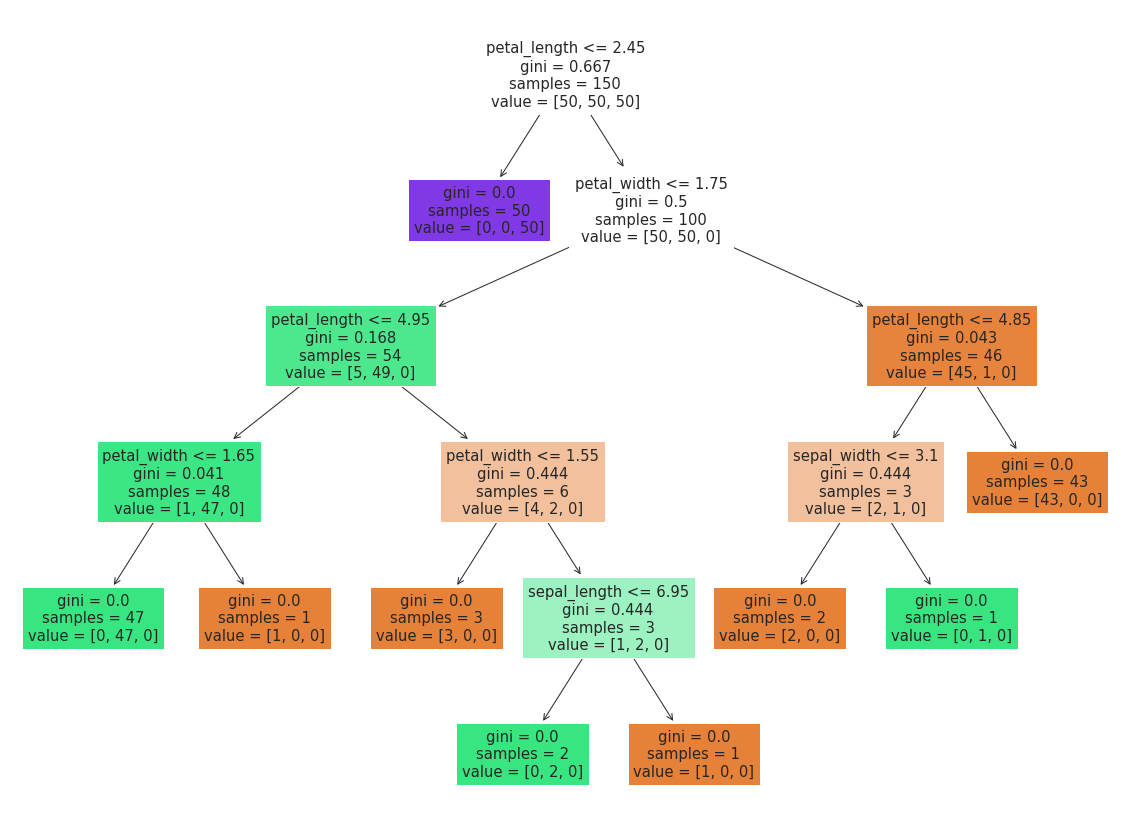

In [181]:
tree = DecisionTreeClassifier(max_depth = 6, random_state=seed)
tree.fit(iris[features], iris.Species.map({'virginica':0, 'versicolor':1, 'setosa':2}))
plt.subplots(figsize=(20,15))
fig = plot_tree(tree, feature_names=features, max_depth=6, filled=True) 

The above plot shows the decision tree when modeling for all target classes.

In [124]:
print_feature_importance(tree, 0.1)
bokeh_multi_class_depth("dt",X,y,seed)

        feature   measure
0  petal_length  0.550723
1   petal_width  0.422611


The above plot allows you to see how the ROC curve for the model on each iris class individualy and allows you to see how adjusting the "max_depth" hyperparameter affects the results.

## Random Forest

In [122]:
rfc = RandomForestClassifier(random_state=seed)
rfc.fit(X, y)
print_feature_importance(rfc, 0.1)
bokeh_multi_class_depth("rf",X,y,seed)

        feature   measure
1  petal_length  0.446168
2   petal_width  0.408468
0  sepal_length  0.123865


You can see that in both Random Forest and Decision Tree, "petal_length" and "petal_width" were the top two important features.

## Naive Bayes

#### Naive Bayes Helper Function

In [160]:
def bokeh_multi_class_var(X,y,seed):
    hover = HoverTool(names=['ROC'], tooltips=[("TPR", "@y_tpr"), ("FPR", "@x_fpr"), ("Thresh", "@thresh")])
    p_tools = [hover, 'save', 'reset']
    p = figure(title=f'ROC curve', tools=p_tools)
    source_ROC=[]
    lin = []
    roc_auc = []
    n_classes = y.shape[1]

    for depth in range(0,11):
        model = OneVsRestClassifier(GaussianNB(var_smoothing=depth)).fit(X,y)
        y_score = model.predict_proba(iris[features])
        roc_d = dict()
        source_d = dict()
        for i in range(n_classes):
            fpr, tpr, thresholds = roc_curve(y[:, i], y_score[:, i])
            roc_d[i] = round(auc(fpr, tpr),3)
            source_d[i] = ColumnDataSource(data=dict(x_fpr=fpr, 
                                                y_tpr=tpr,
                                                thresh=thresholds))
        roc_auc.append(roc_d)
        source_ROC.append(source_d)
        l = []
        c = []
        for i in range(n_classes):    
            if i == 0:
                color = 'red'
            elif i == 1:
                color = 'blue'
            else:
                color = 'green'
            l.append(p.line('x_fpr', 'y_tpr', line_width=1, color=color, source=source_ROC[depth][i], visible =False))
        lin.append(l)
    start = 1
    for i in range(n_classes):  
        lin[start][i].visible=True

    lauc1 = Label(x=.4, y=.2,
                     text='Areas Under the Curve:',
                     background_fill_color='white', background_fill_alpha=1.0)
    lauc2 = Label(x=.4, y=.15,
                     text='Virginica: {}'.format(roc_auc[start][0]), text_color = 'blue',
                     background_fill_color='white', background_fill_alpha=1.0)
    lauc3 = Label(x=.4, y=.1,
                     text='Versicolor: {}'.format(roc_auc[start][1]), text_color = 'red',
                     background_fill_color='white', background_fill_alpha=1.0)
    lauc4 = Label(x=.4, y=.05,
                     text='Setosa: {}'.format(roc_auc[start][2]), text_color = 'green',
                     background_fill_color='white', background_fill_alpha=1.0)
    # Create Interactivity
    ROC_change = CustomJS(args=dict(line=lin, a=roc_auc, lab=[lauc1,lauc2,lauc3,lauc4]), code="""
        var index = cb_obj.value
        for (var i = 0; i < line.length; i++) {
            for (var j = 0; j < 3; j++) {
                line[i][j].visible = false;
            }
        }
        lab[1].text = 'Virginica: ' + a[index][0];
        lab[2].text = 'Versicolor: ' + a[index][1];
        lab[3].text = 'Setosa: ' + a[index][2];
        for (var j = 0; j < 3; j++) {
            line[index][j].visible = true;
        }
    """)
    seld = Slider(start=0, end=10, value=2, step=1, title='Var Smoothing Value')
    seld.js_on_change("value", ROC_change)
    p.add_layout(lauc1)
    p.add_layout(lauc2)
    p.add_layout(lauc3)
    p.add_layout(lauc4)
    show(row(p,seld), notebook_handle=True)

In [173]:
gnb = GaussianNB(var_smoothing=0).fit(iris[features], iris.Species.map({'virginica':0, 'versicolor':1, 'setosa':2}))
bokeh_multi_class_var(X,y,seed)

The plot above is similar to the ones displayed before but allows you to see how adjusting the "variable_smoothing" hyperparameter affects the results for the Gaussian Naive Bayes model.

Accuracy: 0.96
[[47  3  0]
 [ 3 47  0]
 [ 0  0 50]]


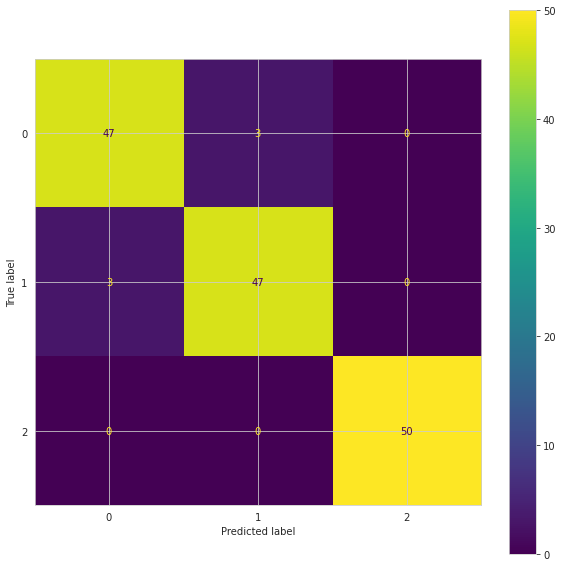

In [174]:
gnb_y_pred = gnb.predict(X)
acc = gnb.score(X, iris.Species.map({'virginica':0, 'versicolor':1, 'setosa':2}))
print('Accuracy:', acc)
print(confusion_matrix(iris.Species.map({'virginica':0, 'versicolor':1, 'setosa':2}), gnb_y_pred)) 
fig, ax = plt.subplots(figsize=(10, 10)) 
plot_confusion_matrix(gnb, X, iris.Species.map({'virginica':0, 'versicolor':1, 'setosa':2}), ax=ax);

The above confusion matrix shows that the Gaussian model, with the best hyper parameters, performs very well but does struggle with differing the "virginica" and "versicolor" classes. 

### Thoughts:

Its hard to say which technique is best at exploring the data set.  For a general look at the data, a 3D plot (Plotly Express) worked very well.  In the case of the Iris set, the size of the dot can be used for the 4th dimension so you can truly get a complete look at the entire data set.  In our case where we knew the Species, color of the dot can be used and you still have a complete look at the data.  Its not exceptionally fancy, but it was very powerful to get a view of the data set.  
For clustering there were a quite a few solid performers.  Kmeans, KMeans Batch, Guasian Mixture, and Mean Shift all performed very well.  There are a lot of great options to show the performance of the techniques against each other - Bar chart for example.  But when you bring the clustering into a 3D visual you continue to get the whole picture.  For example, if you use shape for species, and color for cluster, you can see the clusters and how well the clustering performed.  The individual errors are visible.  You can perfectly see how Setosa is easily clustered, and there is some incorrect clustering between Verisicolor and Virginica.  
Classification is nice as well, but it is hard to beat the artificial scenario of clustering when you have the labels.  The assessment is much more interesting even though you wouldn’t really do it that way in real analysis scenarios. 
Tl;dr 3D visualizations of high performing clustering was the best.  

### Corey and Shuai have successfuly applied Gaussian Naive Bayes to determine the species of the iris flowers they get and have concocted the best smelling iris perfume ever. Buisness is booming.

In [2]:
from IPython.display import HTML
HTML ("""<div style="width:1000px"><iframe allow="fullscreen" frameBorder="0" height="750" src="https://giphy.com/embed/NKLEbyLph0UQnRIQ2p/video" width="1000"></iframe></div>""")
